In [1]:
import pandas as pd
from pandas import read_csv
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

In [9]:
CFS_sample_size = read_csv('data/austin_sample_size.csv')
print(CFS_sample_size.columns)
CFS_sample_size.head(5)

Index(['Mode', 'Sample size', 'shipment count', 'Fraction of count (%)',
       'shipment load', 'Fraction of load (%)'],
      dtype='object')


,Mode,Sample size,shipment count,Fraction of count (%),shipment load,Fraction of load (%)
0,Air,1886,4500537,0.70%,23975,0.00%
1,For-hire Truck,104817,114426358,18.30%,411547156,46.10%
2,Parcel,63921,355679349,56.90%,1513785,0.20%
3,Private Truck,72369,148993826,23.80%,344770487,38.60%
4,Rail/IMX,4080,1419718,0.20%,135143696,15.10%


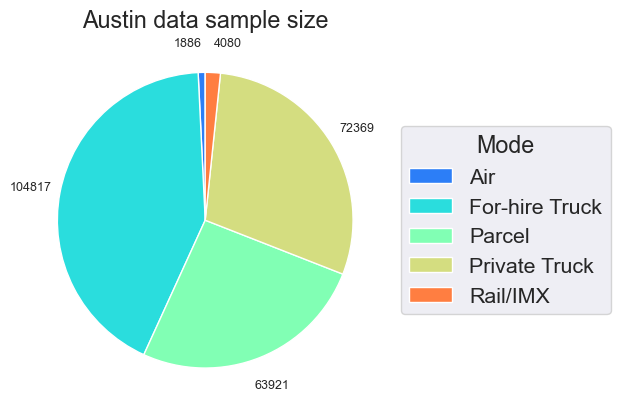

In [14]:
def absolute_value(val):
    a  = np.round(val/100. * CFS_sample_size['Sample size'].sum(), 0)
    return int(a)

def fix_labels(mylabels, tooclose=0.1, sepfactor=2):
    vecs = np.zeros((len(mylabels), len(mylabels), 2))
    dists = np.zeros((len(mylabels), len(mylabels)))
    for i in range(0, len(mylabels)-1):
        for j in range(i+1, len(mylabels)):
            a = np.array(mylabels[i].get_position())
            b = np.array(mylabels[j].get_position())
            dists[i,j] = np.linalg.norm(a-b)
            vecs[i,j,:] = a-b
            if dists[i,j] < tooclose:
                mylabels[i].set_x(a[0] + sepfactor*vecs[i,j,0])
                mylabels[i].set_y(a[1] + sepfactor*vecs[i,j,1])
                mylabels[j].set_x(b[0] - sepfactor*vecs[i,j,0])
                mylabels[j].set_y(b[1] - sepfactor*vecs[i,j,1])
                

palette_color = sns.color_palette('rainbow', n_colors = 5)

wedges, texts, autotexts = plt.pie(CFS_sample_size['Sample size'], 
                                              colors=palette_color,
        labels=CFS_sample_size['Mode'], startangle = 90,
        autopct=absolute_value, pctdistance = 1.2, labeldistance = None)

plt.legend(wedges, CFS_sample_size['Mode'],
          title="Mode",
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9)
plt.title('Austin data sample size')
fix_labels(autotexts, sepfactor=1)
plt.savefig('plot/austin_sample_size.jpg', dpi = 300, bbox_inches = 'tight')
plt.show()

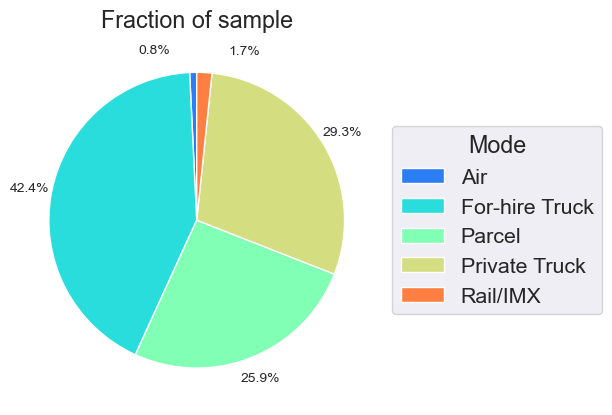

In [11]:
sns.set(font_scale=1.4)  # larger font
wedges, texts, autotexts = plt.pie(CFS_sample_size['Sample size'],
                                   colors=palette_color,
                                   labels=CFS_sample_size['Mode'],
                                   autopct='%.1f%%', startangle = 90,
                                   pctdistance = 1.15, labeldistance = None)

plt.legend(wedges, CFS_sample_size['Mode'],
          title="Mode",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10)
fix_labels(autotexts, sepfactor=3)
plt.title('Fraction of sample')
plt.savefig('plot/austin_sample_by_count_percent.jpg', dpi = 300, bbox_inches = 'tight')
plt.show()

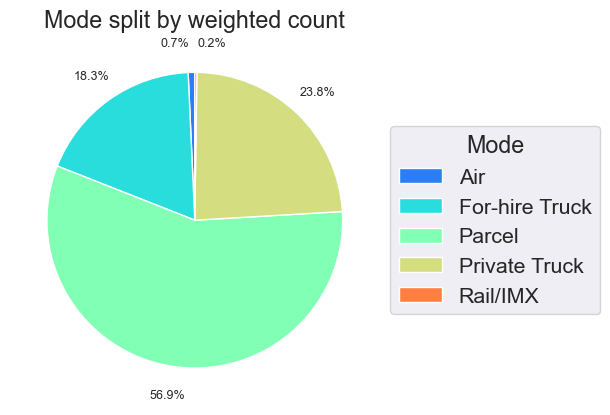

In [12]:

wedges, texts, autotexts = plt.pie(CFS_sample_size['shipment count'],
                                   colors=palette_color,
                                   labels=CFS_sample_size['Mode'],
                                   autopct='%.1f%%', startangle = 90,
                                   pctdistance = 1.2, labeldistance = None)

plt.legend(wedges, CFS_sample_size['Mode'],
          title="Mode",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9)
fix_labels(autotexts, sepfactor=3)
plt.title('Mode split by weighted count')
plt.savefig('plot/austin_sample_by_count.jpg', dpi = 300, bbox_inches = 'tight')
plt.show()

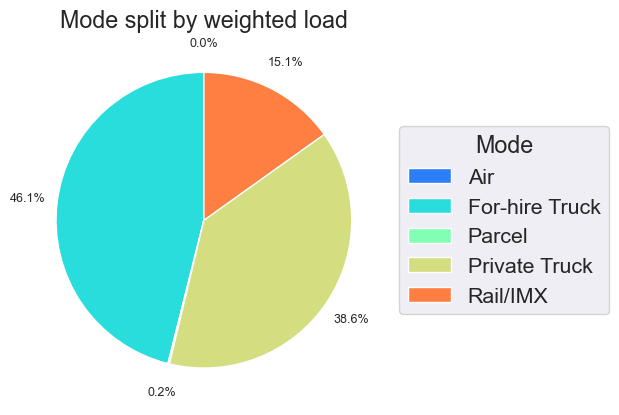

In [13]:

wedges, texts, autotexts = plt.pie(CFS_sample_size['shipment load'],
                                   colors=palette_color,
                                   labels=CFS_sample_size['Mode'],
                                   autopct='%.1f%%', startangle = 90,
                                   pctdistance = 1.2, labeldistance = None)

plt.legend(wedges, CFS_sample_size['Mode'],
          title="Mode",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9)
fix_labels(autotexts, sepfactor=3)
plt.title('Mode split by weighted load')
plt.savefig('plot/austin_sample_by_load.jpg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [38]:
CFS_sample_size.columns


Index(['Mode', 'Sample size',
       'shipment count (weighted by CFS scaling factor)',
       'Fraction of count (%)',
       'shipment load in US ton (weighted by CFS scaling factor)',
       'Fraction of load (%)'],
      dtype='object')